<a href="https://colab.research.google.com/github/Samuel-Wamwitha/Hypothroid-Predictions/blob/master/Samuel_Wamwitha_Core_IP_Week_8_11_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Week 8

## 1. Defining the Question

### a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare dataset provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the metrics for success

Building models and determine which of the models will help the hospital to determine whether or not the patient's symptoms indicate that the patient has hypothyroid.

### c) Understanding the context

Nairobi Hospital is a major healthcare provider to many and they would like to know if a patient has hypothyroid or not from their symptoms. The features from the dataset will help Nairobi Hospital to determine whether or not a patient has hypothroid.

### d) Recording the Experimental Design

1.   Perform EDA
2.   Build the Decision Tree Models
3.   Build the SVM models

### e) Data Revalence

The data was about hypothyroid and symptoms of patients. This was relevant to to Nairobi Hospital, a major hospital that want to study the factors that determine whether a patient has hypothyroid or not.

## 2. Reading the Data

In [171]:
# Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hyp = pd.read_csv('hypothyroid.csv')
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


In [172]:
hyp.status.unique()

array(['hypothyroid', 'negative'], dtype=object)

## 3. Checking the Data

In [173]:
# Determining the number of records
hyp.shape

(3163, 26)

In [174]:
# Previewing the top of the dataset
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


In [175]:
# Previewing the bottom of our dataset
hyp.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.8,y,139,y,0.97,y,143,n,?


In [176]:
# Checking whether each column has an appropriate datatype
hyp.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [177]:
# Checking the columns of the dataset
hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [178]:
# Checking value counts
hyp.age.value_counts()

?     446
59     64
60     64
62     63
28     60
     ... 
98      1
7       1
5       1
90      1
8       1
Name: age, Length: 93, dtype: int64

In [179]:
# Checking value counts
hyp.T3.value_counts()

?       695
1.8     141
1.6     141
2.1     139
1.7     138
       ... 
10.2      1
5.2       1
0         1
8.1       1
5.6       1
Name: T3, Length: 70, dtype: int64

In [180]:
# Checking value counts
hyp.FTI.value_counts()

?      247
107     55
98      55
96      54
105     48
      ... 
334      1
249      1
250      1
272      1
237      1
Name: FTI, Length: 281, dtype: int64

In [181]:
# Dropping irrelevant columns
hyp.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'TBG'], axis = 1, inplace=True)

In [182]:
# Dropping the unique symbol
df1 = hyp[((hyp.sex == '?') |(hyp.age == '?') | ( hyp.TSH == '?') | (hyp.T3 == '?') | (hyp.TT4 == '?') | (hyp.T4U == '?') | (hyp.FTI == '?'))].index
hyp.drop(df1, inplace=True)

In [183]:
# Checking shape
hyp.shape

(2000, 19)

In [184]:
# Changing data types of various columns
hyp = hyp.astype({'age': 'int64', 'TSH': 'float64', 'T3': 'float64', 'TT4': 'float64', 'T4U': 'float64', 'FTI': 'float64'})

In [185]:
# Looking at the data types
hyp.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
dtype: object

In [186]:
# Checking unique values
hyp.query_hyperthyroid.unique()

array(['f', 't'], dtype=object)

In [187]:
# Checking unique values
hyp.sex.unique()

array(['M', 'F'], dtype=object)

In [188]:
# Checking if there is any '?' in our data
exists = '?' in hyp
print(exists)

False


In [189]:
# Label encoding the columns
from sklearn.preprocessing import LabelEncoder

label_object = {}
categorical_columns = ['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']
for col in categorical_columns:
  labelencoder = LabelEncoder()
  labelencoder.fit(hyp[col])
  hyp[col] = labelencoder.fit_transform(hyp[col])
  label_object[col] = labelencoder

In [190]:
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


In [191]:
# Checking for duplicates
hyp.duplicated().sum()

54

In [192]:
# Dropping duplicates
hyp.drop_duplicates(inplace = True)

## 4. Tidying the Dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


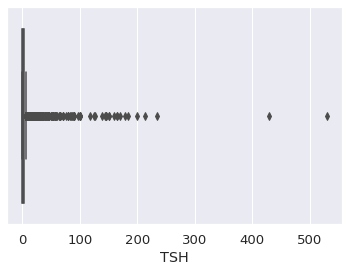

In [96]:
# Checking for Outliers
sns.boxplot(hyp.TSH)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


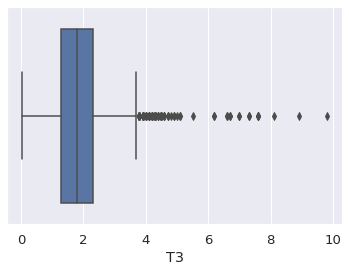

In [97]:
# Checking for Outliers
sns.boxplot(hyp.T3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


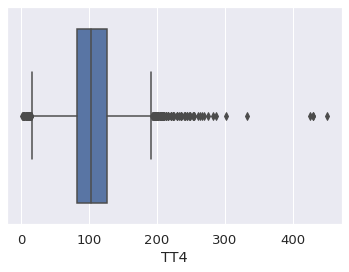

In [98]:
# Checking for Outliers
sns.boxplot(hyp.TT4)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


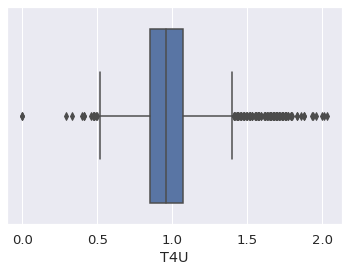

In [99]:
# Checking for Outliers
sns.boxplot(hyp.T4U)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


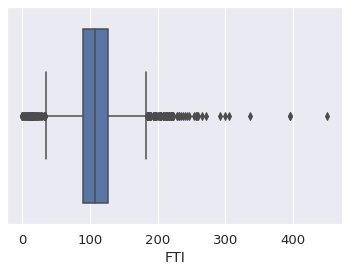

In [100]:
# Checking for Outliers
sns.boxplot(hyp.FTI)

In [194]:
# Checking for missing values
hyp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
dtype: int64

## 5. Exploratory Data Analysis

### Univariate Analysis

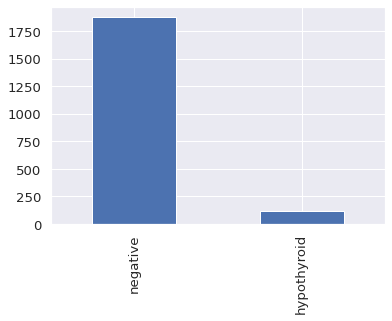

In [101]:
# Plotting value counts of status
hyp['status'].value_counts().plot(kind='bar')

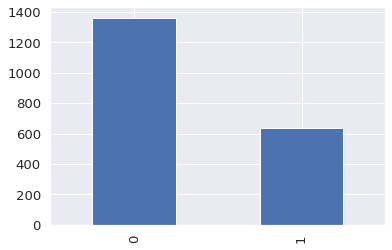

In [102]:
# Plotting value counts of sex
hyp['sex'].value_counts().plot(kind='bar')

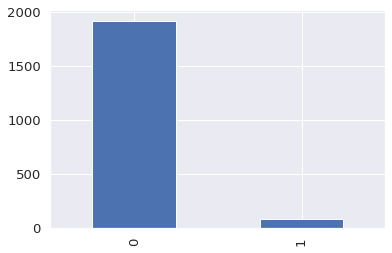

In [103]:
# Plotting value counts of sick
hyp['sick'].value_counts().plot(kind='bar')

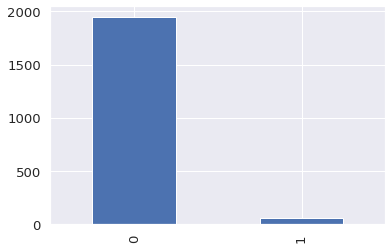

In [104]:
# Plotting value counts of pregnant
hyp['pregnant'].value_counts().plot(kind='bar')

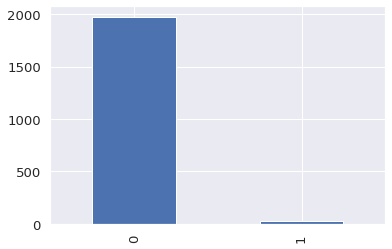

In [105]:
# Plotting value counts of tumor
hyp['tumor'].value_counts().plot(kind='bar')

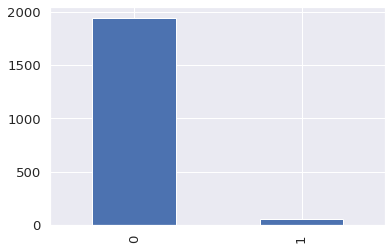

In [106]:
# Plotting value counts of goitre
hyp['goitre'].value_counts().plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


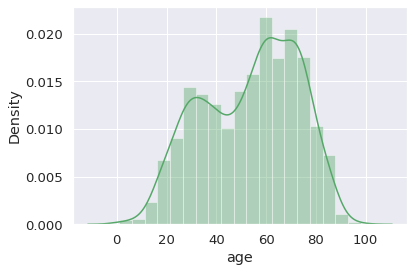

In [107]:
# Plotting the Distplot
sns.distplot(hyp.age, color="g")

Observations

From the analysis the following observations were made:

- Most patients were negative
- Most patients were female
- Most patients were not sick
- Most patients were not pregnant
- Most patients did not have a tumor
- Most patients did not have a goitre

### Bivariate Analysis

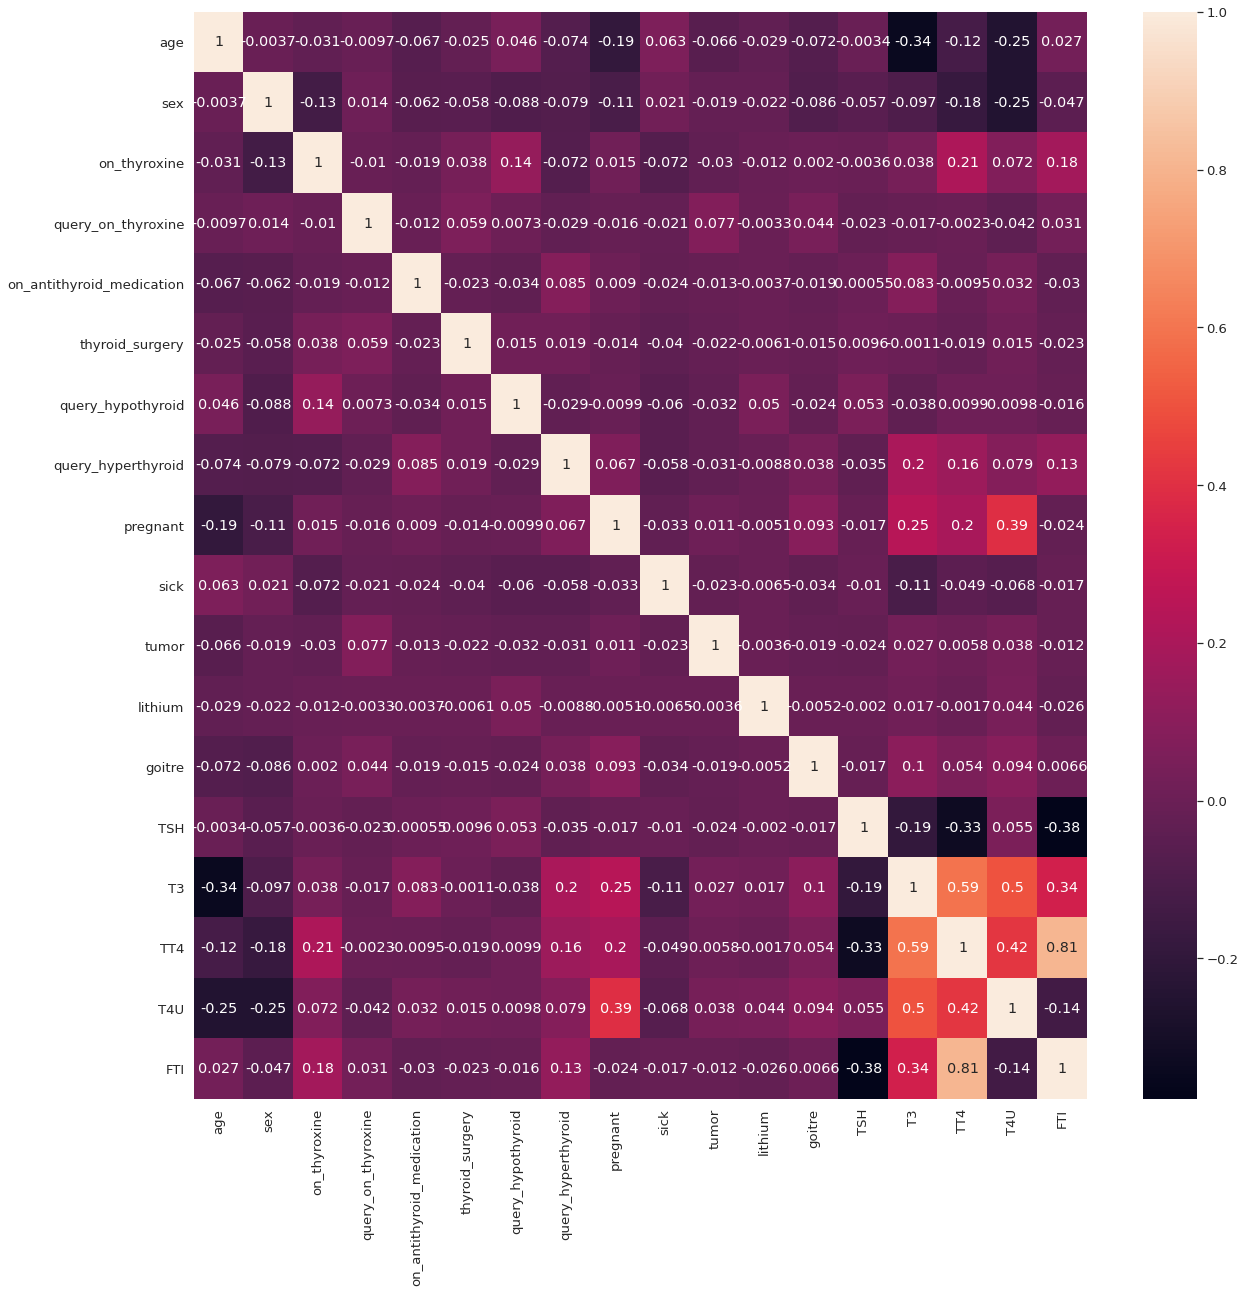

In [109]:
# Getting the correlations of the dataset
ind = hyp[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI']]

plt.subplots(figsize=(20,20))
sns.heatmap(ind.corr(),annot=True)

Observations

- TT4 and FTI have a high correlation of 0.81. This means these independent variables are highly correlated of each other.

- TT4 and T3 have a correlation of 0.59. This means these independent variables are moderately correlated of each other.

- TSH and FTI have a high correlation of -0.38. This means these independent variables are lowly correlated of each other.

In [110]:
ages = hyp.groupby('status')['age'].mean().reset_index()
ages

,status,age
0,hypothyroid,55.885246
1,negative,53.475506


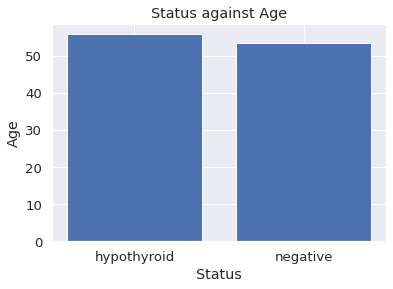

In [111]:
# Plotting a bar graph of Status against Age
plt.bar(ages.status, ages.age)
plt.title('Status against Age')
plt.xlabel('Status')
plt.ylabel('Age')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


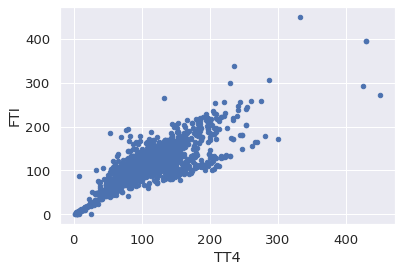

In [112]:
# Creating a scatter plot between TT4 and FTI
hyp.plot.scatter(x='TT4', y='FTI')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


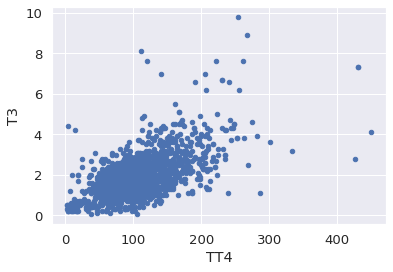

In [113]:
# Creating a scatter plot between TT4 and T3
hyp.plot.scatter(x='TT4', y='T3')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


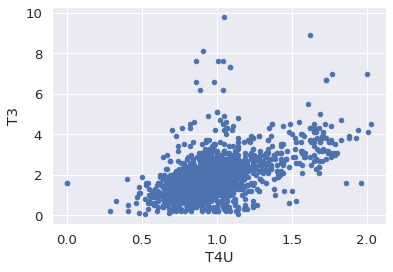

In [114]:
# Creating a scatter plot between T4U and T3
hyp.plot.scatter(x='T4U', y='T3')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


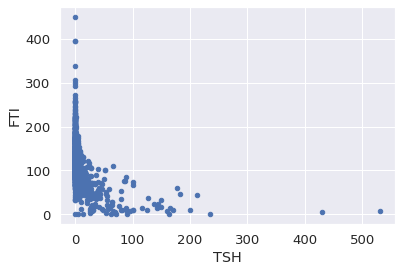

In [115]:
# Creating a scatter plot between TSH and FTI
hyp.plot.scatter(x='TSH', y='FTI')

Observations

- The mean age of people with hypothyroid was 55.89 and the mean age of people who are negative was 53.48

- From the scatter plots TSH and FTI show a negative correlation and the rest positive correlation.

## 6. Implementing the Solution

### Decision Trees

#### Random Forest

In [118]:
# Splitting the independent and dependent variables
X = hyp.drop(['status'], axis = 1)
y = hyp['status']


In [119]:
# Splitting and Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest classifier
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predicting the model
y_pred = forest.predict(X_test)

In [120]:
from sklearn import metrics

# Checking the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [121]:
test_features = hyp.columns.to_list()
test_features.remove('status')

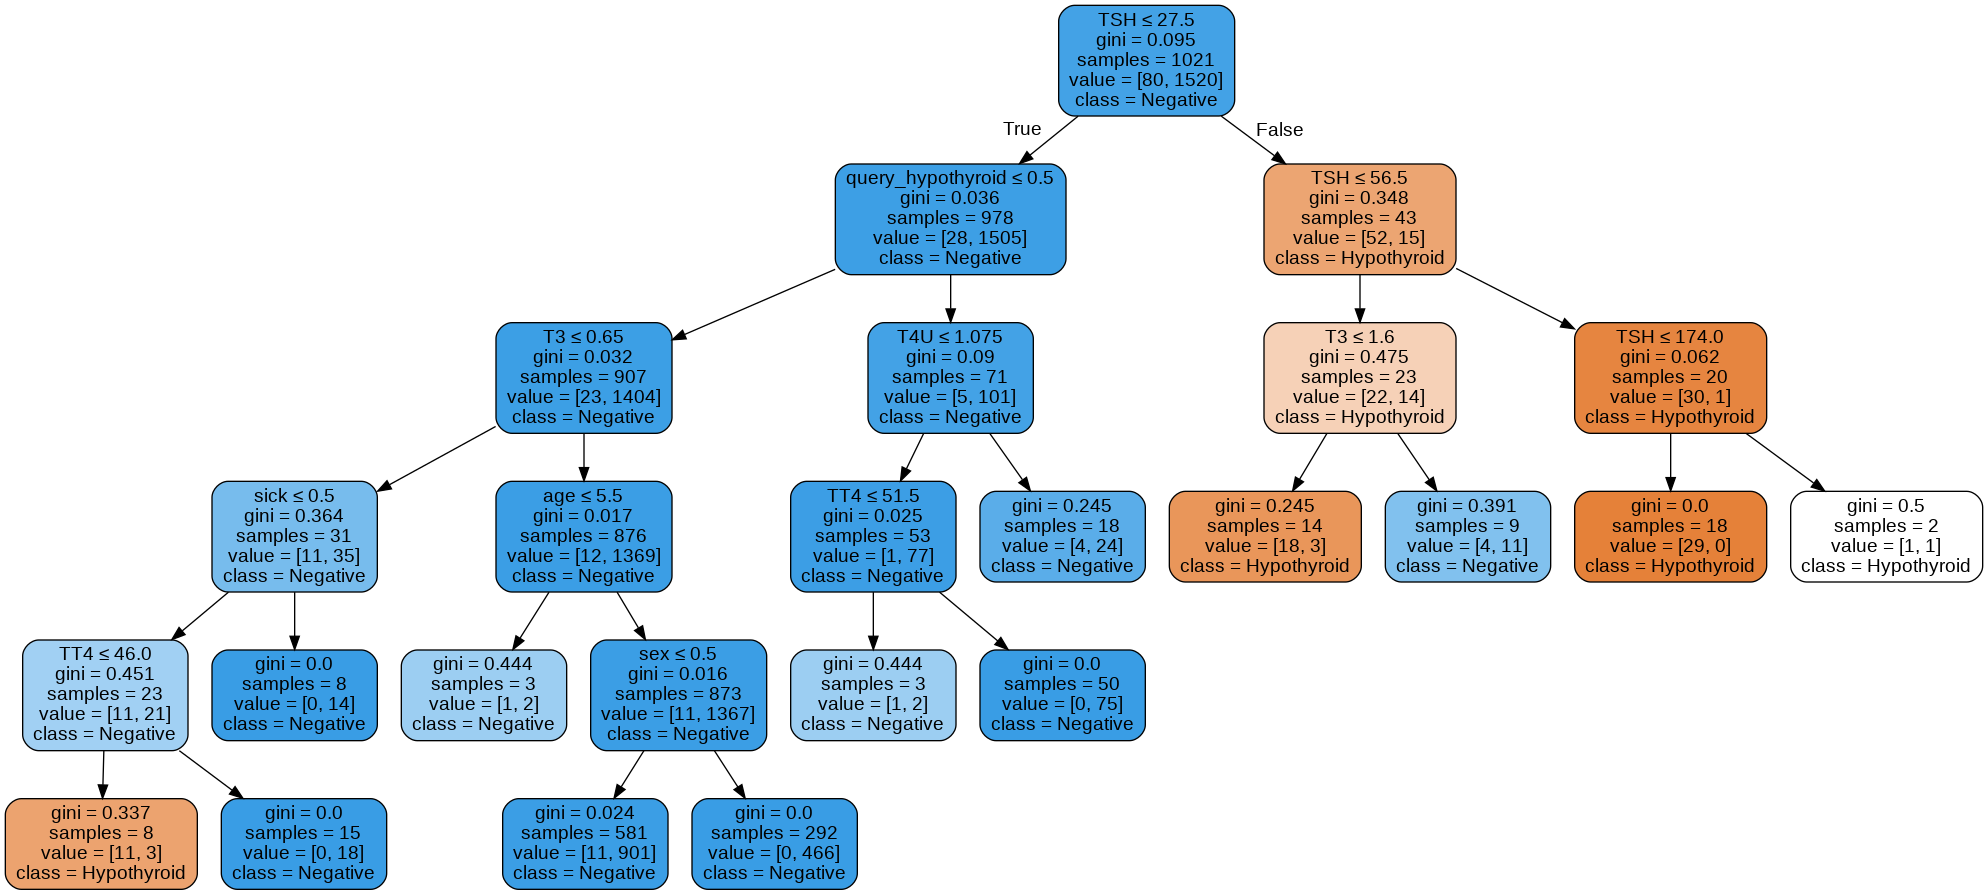

In [122]:
# Creating the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Hypothyroid', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

In [123]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TSH                  Importance: 0.76
Variable: T3                   Importance: 0.1
Variable: TT4                  Importance: 0.1
Variable: sick                 Importance: 0.02
Variable: age                  Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: FTI                  Importance: 0.0


#### ADA Boosted

In [124]:
# Create a ADA Boost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=100, random_state=42)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

In [125]:
from sklearn import metrics

# Checking the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

Accuracy: 0.99


In [126]:
test_features = hyp.columns.to_list()
test_features.remove('status')

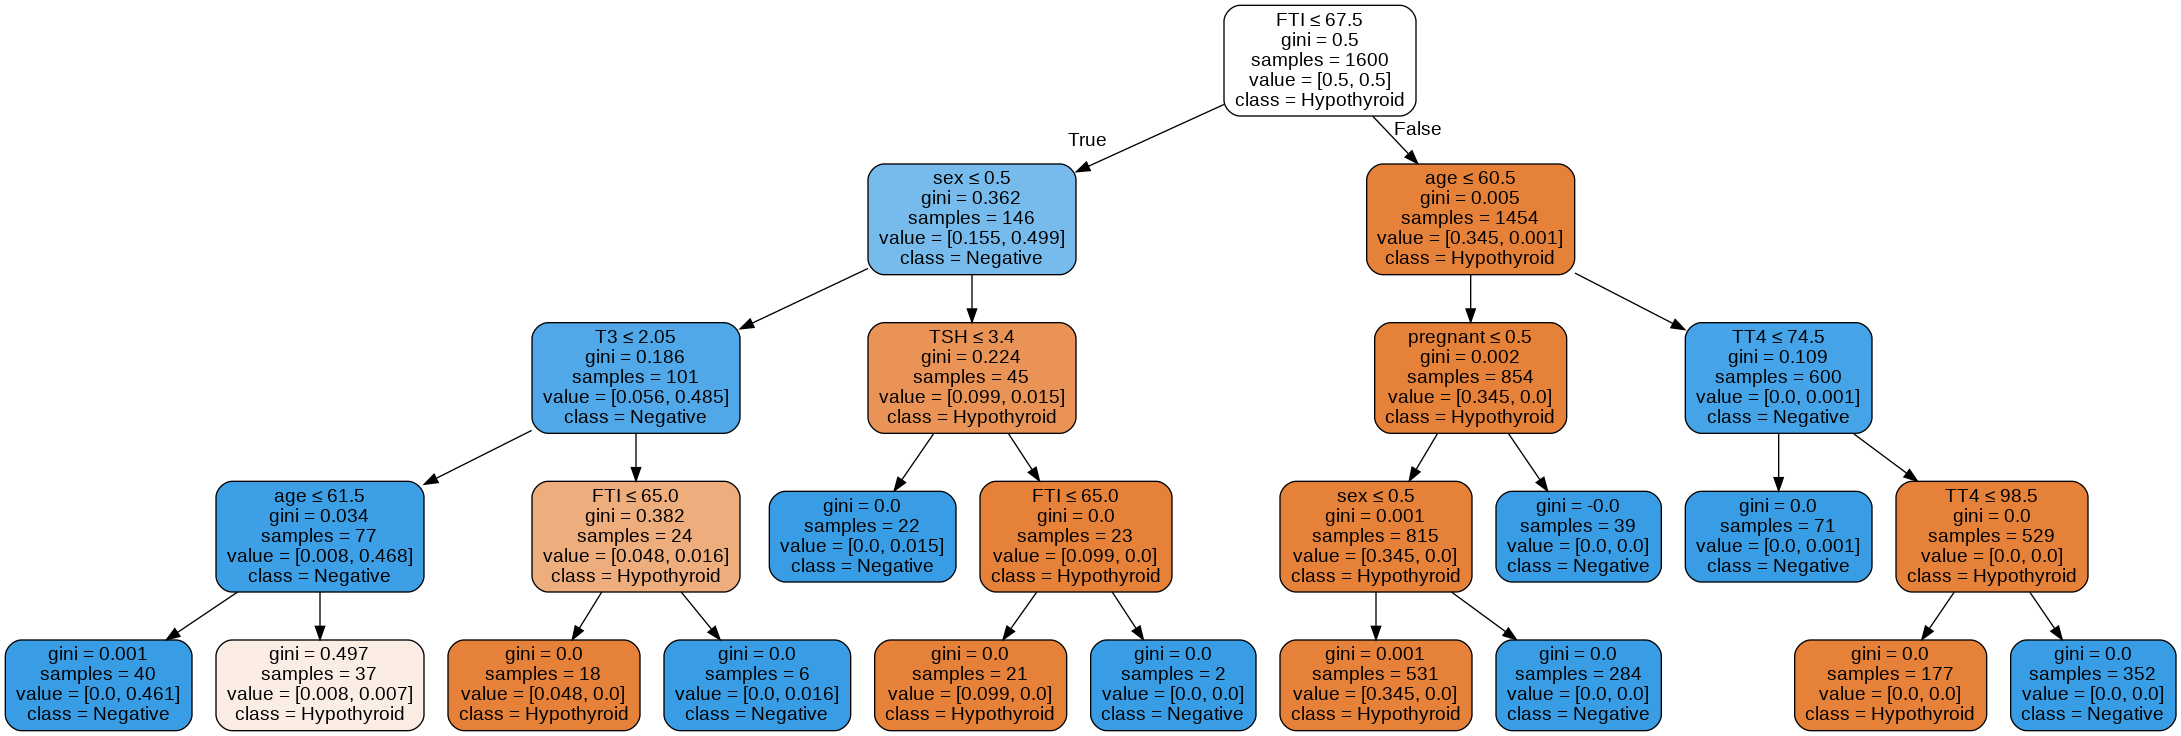

In [127]:
# Creating the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
tree1 = ada_boost.estimators_[50]

export_graphviz(tree1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Hypothyroid', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [128]:
# Get numerical feature importances
importances = list(tree1.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.58
Variable: sex                  Importance: 0.23
Variable: T3                   Importance: 0.12
Variable: TSH                  Importance: 0.05
Variable: age                  Importance: 0.02
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TT4                  Importance: 0.0
Variable: T4U                  Importance: 0.0


#### Gradient Boosted

In [129]:
# Create a Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

gra_boost = GradientBoostingClassifier(n_estimators=100, max_depth=4, random_state=42)

gra_boost = gra_boost.fit(X_train, y_train)
y_pred_gra = gra_boost.predict(X_test)

In [130]:
from sklearn import metrics

# Checking the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gra))

Accuracy: 0.9875


In [131]:
test_features = hyp.columns.to_list()
test_features.remove('status')

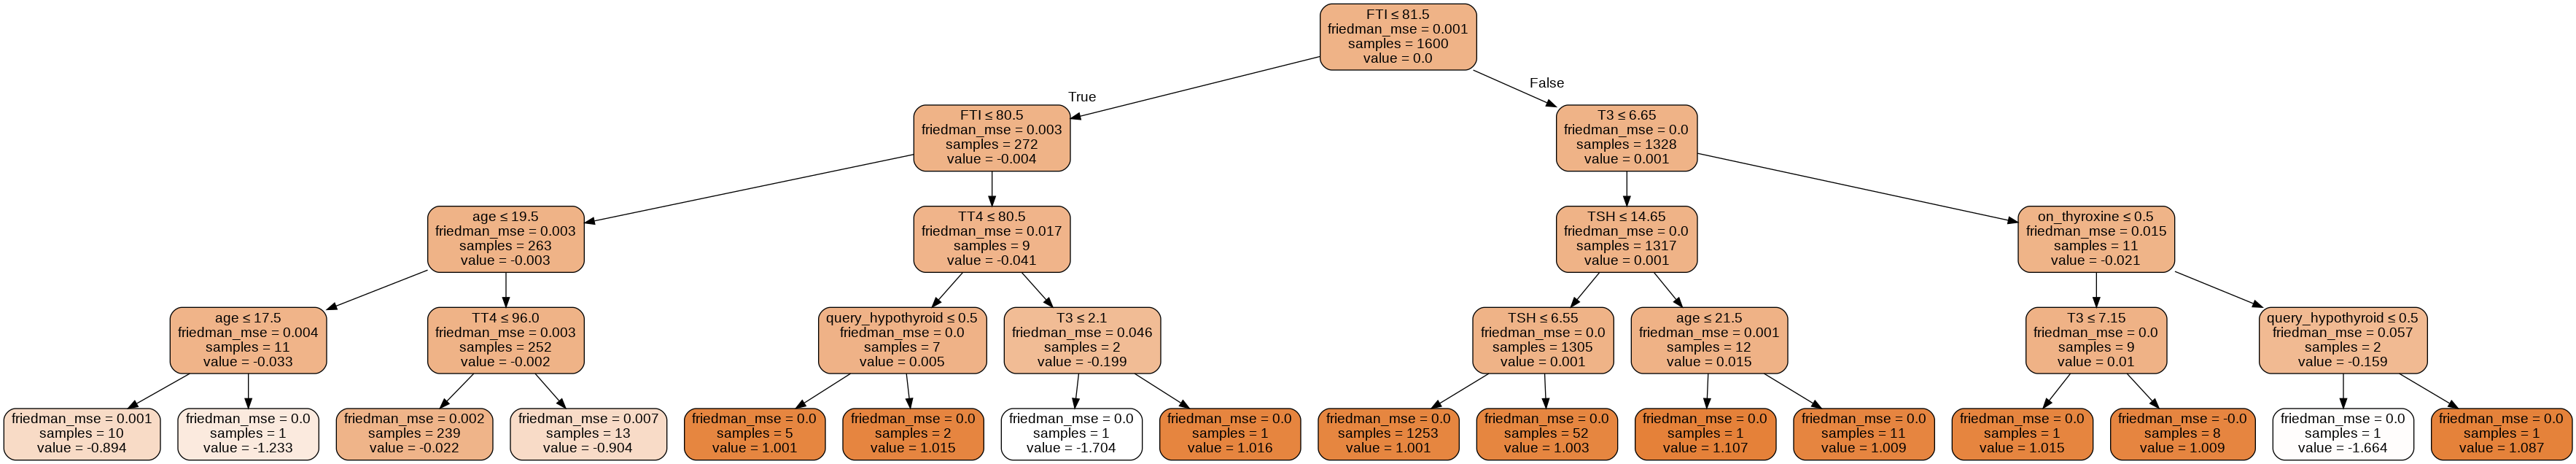

In [132]:
# Create the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
gbc = gra_boost.estimators_[50, 0]

export_graphviz(gbc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Hypothyroid', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [133]:
# Get numerical feature importances
importances = list(gbc.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: query_hypothyroid    Importance: 0.29
Variable: T3                   Importance: 0.25
Variable: TT4                  Importance: 0.18
Variable: on_thyroxine         Importance: 0.12
Variable: age                  Importance: 0.11
Variable: FTI                  Importance: 0.05
Variable: TSH                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: T4U                  Importance: 0.0


#### Observations



The ADA model had the highest accuracy compared to the other models. This model will be the most suitable to use.

The features that were most usefull in influencing the predictions for this model were FTI, sex and T3.

### Support Vector Machine

#### Polynomial

In [135]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

# Data preprocessing
X = hyp[['TSH', 'T3']]
y = hyp['status']

X.shape

(2000, 2)

In [136]:
# Converting the data type for Status column
y = y.astype('category')

# Converting each value in the Status column into a number.
y =y.cat.codes

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [137]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [138]:
# Making prediction
y_pred = polyclassifier.predict(X_test)

In [139]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9425
[[  9  22]
 [  1 368]]


#### Linear

In [150]:
# Building the model 
polyclassifier = SVC(kernel='linear')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
# Making prediction
y_pred = polyclassifier.predict(X_test)

In [152]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.96
[[ 18  13]
 [  3 366]]


#### Radial Basis Function

In [140]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [141]:
# Making prediction
y_pred = rbfclassifier.predict(X_test)

In [142]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9675
[[ 26   5]
 [  8 361]]


#### Radial Basis Function with more parameters

In [166]:
# Data preprocessing
# Removing the target column
df = hyp.drop('status', axis=1)
y = hyp['status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=10).fit(df)
X = pca.transform(df)
X.shape

(2000, 10)

In [167]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', C=2.0, degree=4, gamma='auto')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [168]:
# Making prediction
y_pred = rbfclassifier.predict(X_test)

In [169]:
# Model Evaluation
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.965
[[ 23   8]
 [  6 363]]


#### Observations

The best performing kernel was Radial Basis function with an accuracy of 0.97. 

After using 10 features and using hyperparameters ( C=2, degree=4 and gamma=auto) the accuracy of the kernel dropped to 0.965. Hence, changing the parameters has an effect on the accuracy of the model.

## 7. Challenging the Solution

### Sigmoid Function

In [143]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')

# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [144]:
# Making prediction
y_pred = sigclassifier.predict(X_test)

In [145]:
# Model Evaluation
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.97
[[ 25   6]
 [  6 363]]


The solution was challenged by performing a Sigmoid kernel function using 2 features and same parameters as the othe kernels. 

It turned out Sigmoid performed better than the others kernels with an accuracy of 97%. This shows that Sigmoid is the best kernel to use to determine whether a patient has hypothyroid or not.

## 8. Follow up Questions

a) Did we have the right data?

b) Do we need other data to answer our question?

The data was enough to enable a model to be build from it.

c) Did we have the right question?

The question was right according to the dataset being investigated.